In [68]:
import selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import os
import sys
import requests
import urllib
from bs4 import BeautifulSoup
from urllib.request import urlopen
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import pandas as pd

url  = "https://home.kahis.go.kr/home/lkntscrinfo/selectLkntsStats.do"

chrome_options = Options()
chrome_options.add_argument("--disable-gpu")
chrome_options.add_argument("--no-sandbox")

# Set up the WebDriver
service = Service(executable_path="/home/sungyoon/chromedriver-linux64/chromedriver") 
driver = webdriver.Chrome(service=service, options=chrome_options)

driver.get(url)

time.sleep(3)

print(driver.title)

driver.maximize_window()

element1 = driver.find_element(By.CSS_SELECTOR, "#occrFromDtId")
element1.click()
element1.send_keys("19950101")

element2 = driver.find_element(By.CSS_SELECTOR, "#occrToDtId")
element2.click()
element2.send_keys("20231231")

element3 = driver.find_element(By.CSS_SELECTOR, "#lstkspClId > option:nth-child(10)")
element3.click()

time.sleep(1)
search_btn = driver.find_element(By.CSS_SELECTOR, "#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(1) > tbody > tr > td:nth-child(3) > a > img")
search_btn.click()

for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    print(year, Virus_count.text)

# Create a list to store the data
data = []

# Collect data for each year
for year in range(1995, 2024):
    css_selector = f"#homeLkntscrinfoVO > table:nth-child(5) > tbody > tr > td:nth-child(2) > table:nth-child(2) > tbody > tr:nth-child(3) > td > table > tbody > tr:nth-child({year - 1994}) > td:nth-child(19) > span.had"
    Virus_count = driver.find_element(By.CSS_SELECTOR, css_selector)
    data.append({"Year": year, "Virus Count": Virus_count.text})

# Create a DataFrame
df_virus = pd.DataFrame(data)

# Display the DataFrame

driver.quit()


법정가축전염병 발생통계
1995 59
1996 393
1997 260
1998 230
1999 48
2000 21,549
2001 27,787
2002 30,155
2003 48,657
2004 15,833
2005 10,862
2006 18,608
2007 15,682
2008 13,857
2009 9,717
2010 4,573
2011 1,342
2012 1,454
2013 5,474
2014 36,108
2015 18,988
2016 9,610
2017 7,586
2018 35,078
2019 29,342
2020 4,679
2021 5,791
2022 21,351
2023 9,026


In [69]:
print(df_virus)

    Year Virus Count
0   1995          59
1   1996         393
2   1997         260
3   1998         230
4   1999          48
5   2000      21,549
6   2001      27,787
7   2002      30,155
8   2003      48,657
9   2004      15,833
10  2005      10,862
11  2006      18,608
12  2007      15,682
13  2008      13,857
14  2009       9,717
15  2010       4,573
16  2011       1,342
17  2012       1,454
18  2013       5,474
19  2014      36,108
20  2015      18,988
21  2016       9,610
22  2017       7,586
23  2018      35,078
24  2019      29,342
25  2020       4,679
26  2021       5,791
27  2022      21,351
28  2023       9,026


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46076 (\N{HANGUL SYLLABLE DWAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGU

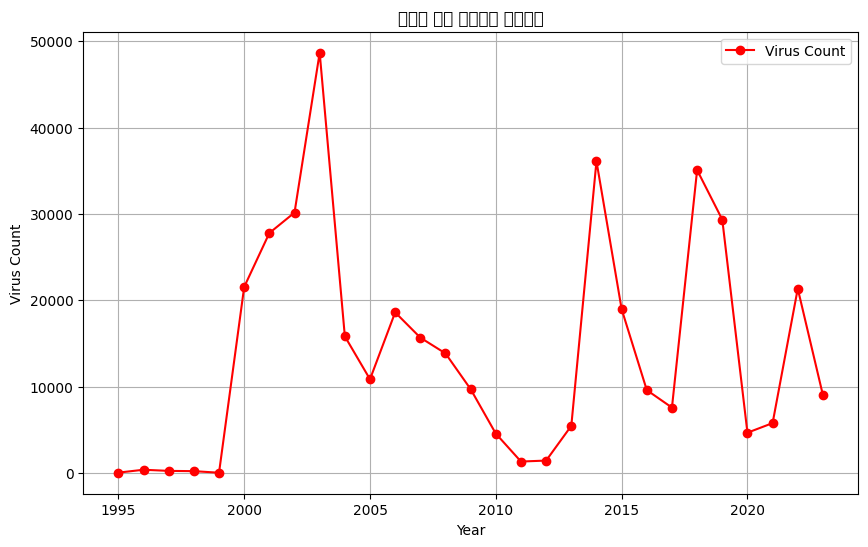

In [70]:
import matplotlib.pyplot as plt

# Ensure Virus Count is numeric for sorting and plotting
df_virus['Virus Count'] = df_virus['Virus Count'].str.replace(',', '').astype(int)

# Sort the DataFrame by Year to ensure correct order
df_virus = df_virus.sort_values(by='Year')

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df_virus['Year'], df_virus['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

plt.xlabel('Year')
plt.ylabel('Virus Count')
plt.title('연도별 돼지 바이러스 발생통계')
plt.grid(True)
plt.legend()

plt.show()

In [71]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL
url = "http://www.kmta.or.kr/kr/data/stats_price_year.php"

# 요청
response = requests.get(url)
response.encoding = 'utf-8'

# 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 표 선택
table = soup.select_one("div.contents.p_stats > table")
rows = table.select("tr")

# 연도 및 값 수집
data = []
start_year = 1993
for i, row in enumerate(rows[2:], start=0):  # 헤더 2줄 건너뜀
    if start_year + i > 2024:
        break  # 2024년까지만
    cells = row.find_all("td")
    if len(cells) >= 4:
        value = cells[3].get_text(strip=True)
        year = start_year + i
        data.append({"연도": f"{year}", "도축가": value})

# DataFrame 생성
df_price = pd.DataFrame(data)

# 출력
print(df_price)

      연도    도축가
0   1993  2,151
1   1994  2,373
2   1995  2,298
3   1996  2,490
4   1997  2,422
5   1998  2,514
6   1999  3,017
7   2000  2,499
8   2001  2,599
9   2002  2,645
10  2003  2,444
11  2004  3,479
12  2005  3,730
13  2006  3,649
14  2007  3,247
15  2008  4,046
16  2009  4,449
17  2010  4,232
18  2011  5,808
19  2012  3,974
20  2013  3,570
21  2014  4,741
22  2015  4,939
23  2016  4,617
24  2017  4,947
25  2018  4,362
26  2019  3,843
27  2020  4,216
28  2021  4,722
29  2022  5,227
30  2023  5,134
31  2024  5,239


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SY

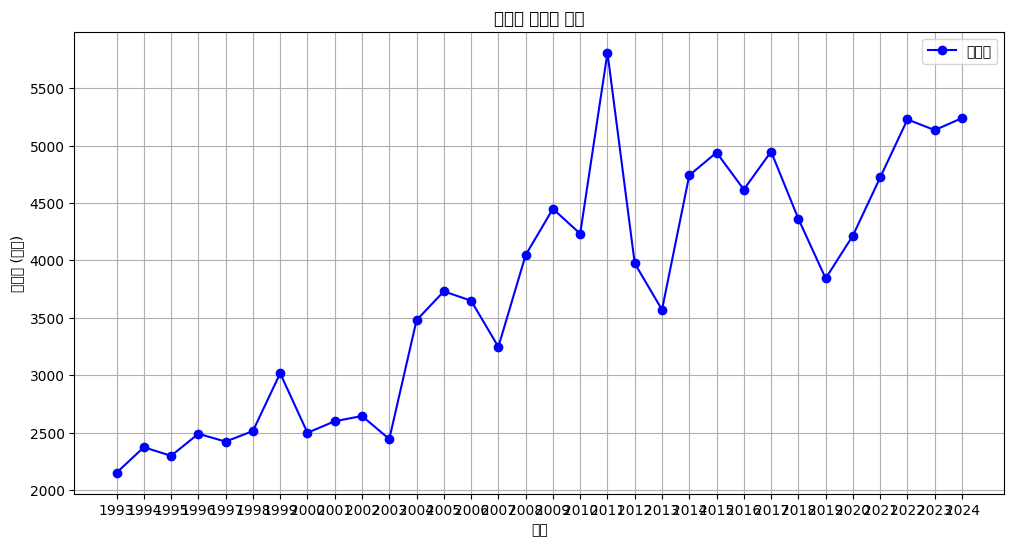

In [72]:
import matplotlib.pyplot as plt

# 데이터 변환: 도축가 값을 숫자로 변환
df_price['도축가'] = df_price['도축가'].str.replace(',', '').astype(int)

# 플로우차트 생성
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('도축가 (천원)')
plt.title('연도별 도축가 변화')
plt.grid(True)
plt.legend()

# 그래프 표시
plt.show()

      연도   도축가  Year  Virus Count
0   1995  2298  1995           59
1   1996  2490  1996          393
2   1997  2422  1997          260
3   1998  2514  1998          230
4   1999  3017  1999           48
5   2000  2499  2000        21549
6   2001  2599  2001        27787
7   2002  2645  2002        30155
8   2003  2444  2003        48657
9   2004  3479  2004        15833
10  2005  3730  2005        10862
11  2006  3649  2006        18608
12  2007  3247  2007        15682
13  2008  4046  2008        13857
14  2009  4449  2009         9717
15  2010  4232  2010         4573
16  2011  5808  2011         1342
17  2012  3974  2012         1454
18  2013  3570  2013         5474
19  2014  4741  2014        36108
20  2015  4939  2015        18988
21  2016  4617  2016         9610
22  2017  4947  2017         7586
23  2018  4362  2018        35078
24  2019  3843  2019        29342
25  2020  4216  2020         4679
26  2021  4722  2021         5791
27  2022  5227  2022        21351
28  2023  5134

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGU

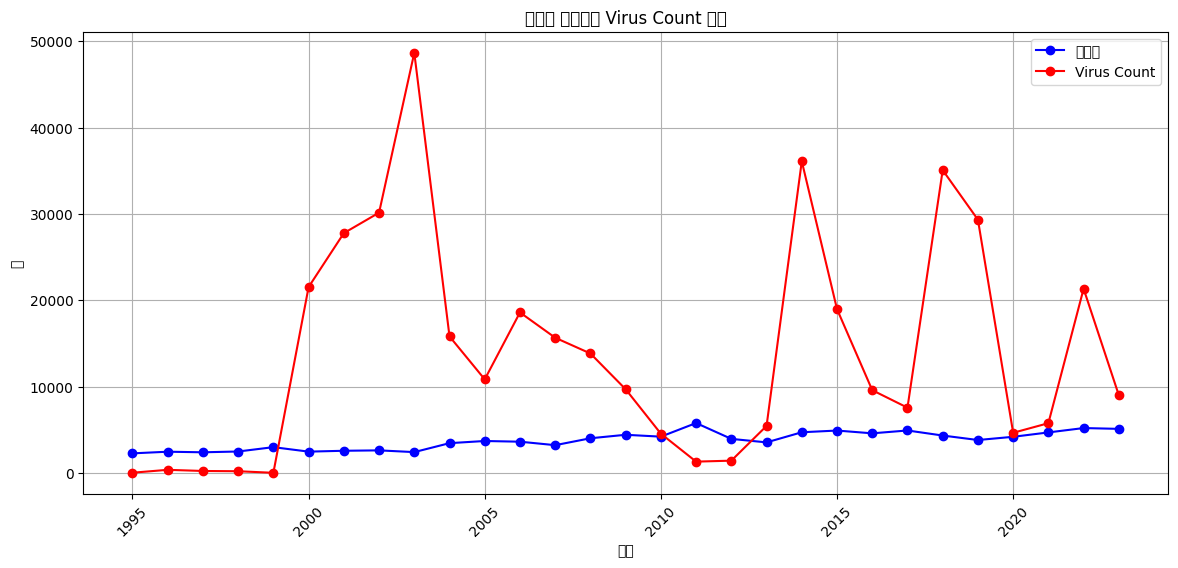

상관계수:
                  도축가  Virus Count
도축가          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [83]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 병합된 데이터 확인
print(df_merged)

# 그래프 설정
plt.figure(figsize=(14, 6))

# 도축가 그래프
plt.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color='b', label='도축가')

# Virus Count 그래프
plt.plot(df_merged['연도'], df_merged['Virus Count'], marker='o', linestyle='-', color='r', label='Virus Count')

# 그래프 꾸미기
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 도축가와 Virus Count 변화')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # X축 레이블 회전
# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)

      연도   도축가  Year  Virus Count
0   1995  2298  1995           59
1   1996  2490  1996          393
2   1997  2422  1997          260
3   1998  2514  1998          230
4   1999  3017  1999           48
5   2000  2499  2000        21549
6   2001  2599  2001        27787
7   2002  2645  2002        30155
8   2003  2444  2003        48657
9   2004  3479  2004        15833
10  2005  3730  2005        10862
11  2006  3649  2006        18608
12  2007  3247  2007        15682
13  2008  4046  2008        13857
14  2009  4449  2009         9717
15  2010  4232  2010         4573
16  2011  5808  2011         1342
17  2012  3974  2012         1454
18  2013  3570  2013         5474
19  2014  4741  2014        36108
20  2015  4939  2015        18988
21  2016  4617  2016         9610
22  2017  4947  2017         7586
23  2018  4362  2018        35078
24  2019  3843  2019        29342
25  2020  4216  2020         4679
26  2021  4722  2021         5791
27  2022  5227  2022        21351
28  2023  5134

/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/549153116.py:33: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.tight

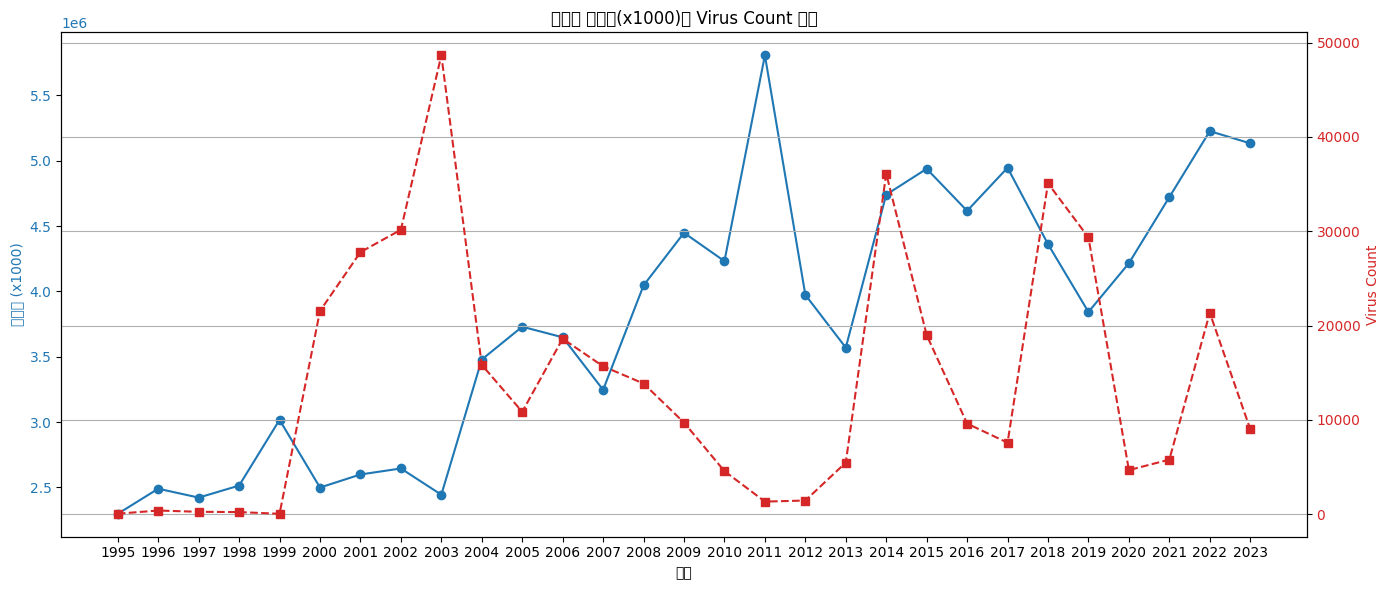

상관계수:
                  도축가  Virus Count
도축가          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [84]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 병합된 데이터 확인
print(df_merged)

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('연도별 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/1676802944.py:31: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fi

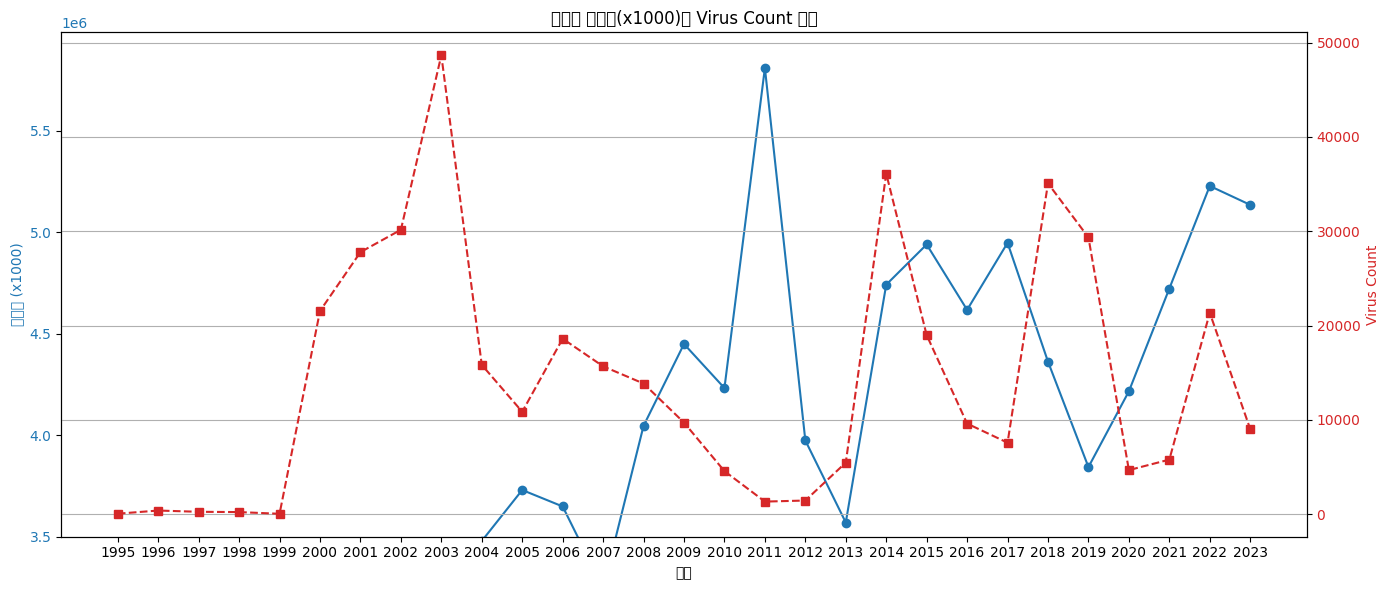

상관계수:
                  도축가  Virus Count
도축가          1.000000    -0.053717
Virus Count -0.053717     1.000000


In [85]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])
ax1.set_ylim(bottom=3500 * 1000)  # 💡 도축가 y축 범위 시작점 설정

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('연도별 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/32571349.py:34: UserWarning: Glyph 54980 (\N{HANGUL SYLLABLE HU}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/

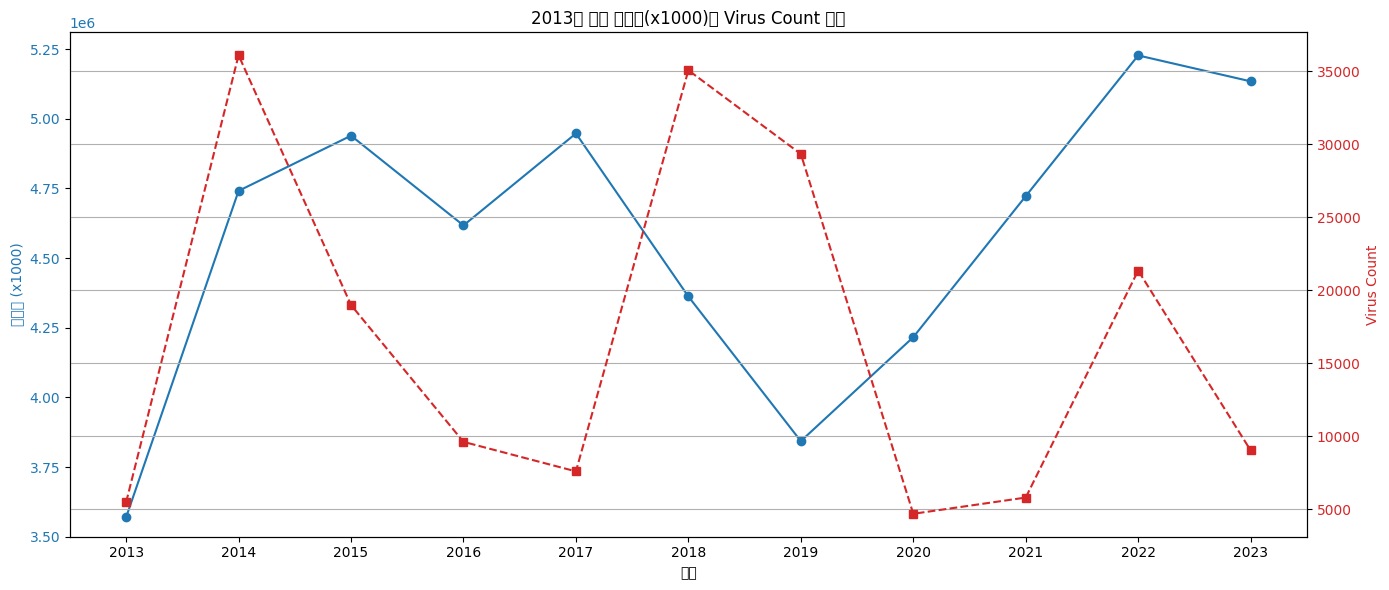

상관계수:
                  도축가  Virus Count
도축가          1.000000    -0.001025
Virus Count -0.001025     1.000000


In [86]:
import matplotlib.pyplot as plt
import pandas as pd

df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)

# 병합
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')

# ✅ 2013년 이후 데이터만 선택
df_merged = df_merged[df_merged['연도'] >= 2013]

# 그래프 설정
fig, ax1 = plt.subplots(figsize=(14, 6))

# 첫 번째 y축 (왼쪽): 도축가 (단위 ×1000)
color = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (x1000)', color=color)
ax1.plot(df_merged['연도'], df_merged['도축가'] * 1000, marker='o', linestyle='-', color=color, label='도축가 (x1000)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(df_merged['연도'])
ax1.set_ylim(bottom=3500 * 1000)  # y축 범위 조절

# 두 번째 y축 (오른쪽): Virus Count
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Virus Count', color=color)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color)

# 그래프 제목 및 꾸미기
plt.title('2013년 이후 도축가(x1000)와 Virus Count 변화')
fig.tight_layout()
plt.grid(True)

# 그래프 표시
plt.show()

# 상관관계 분석
correlation = df_merged[['도축가', 'Virus Count']].corr()
print("상관계수:")
print(correlation)


In [87]:
df_merged['Virus Count (전년도)'] = df_merged['Virus Count'].shift(1)
df_merged[['도축가', 'Virus Count (전년도)']].corr()


,도축가,Virus Count (전년도)
도축가,1.000000,-0.418443
Virus Count (전년도),-0.418443,1.000000


In [88]:
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}년)'] = df_merged['Virus Count'].shift(i)
    print(f"시차 {i}년 vs 도축가: ", df_merged[['도축가', f'Virus Count (-{i}년)']].corr().iloc[0, 1])


시차 1년 vs 도축가:  -0.41844322892323904
시차 2년 vs 도축가:  -0.2718128449211686
시차 3년 vs 도축가:  0.4067781622987559


/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2706557659.py:36: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.

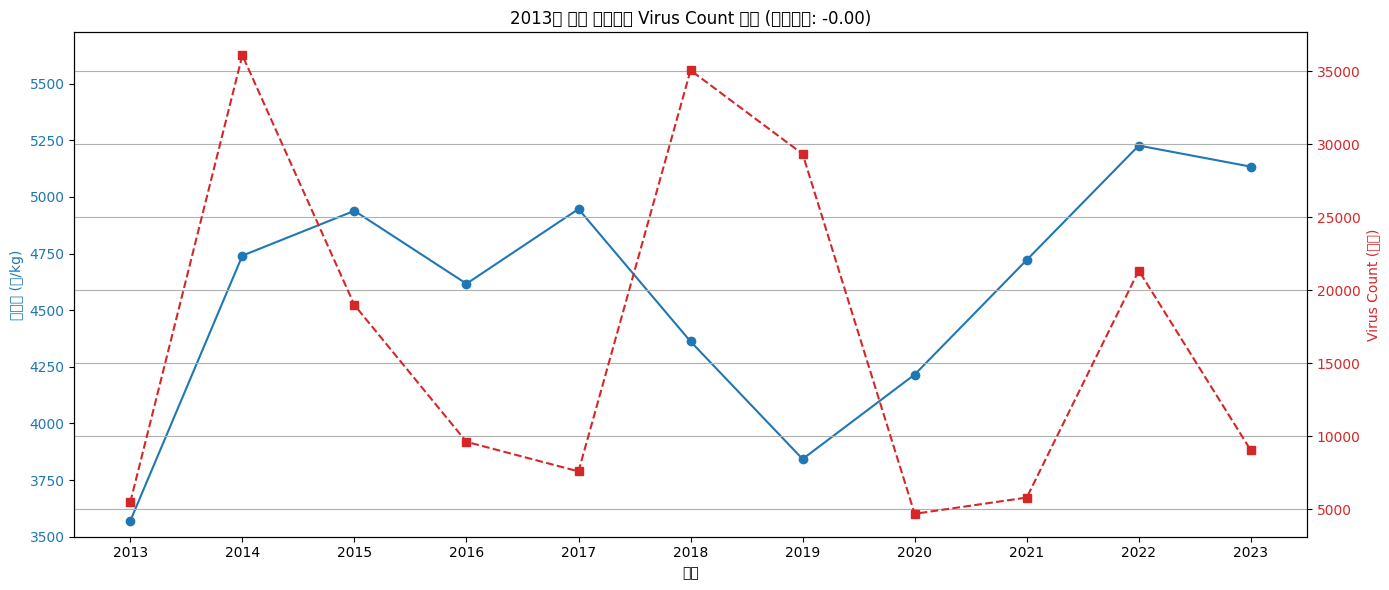

In [89]:
import matplotlib.pyplot as plt
import pandas as pd

# 전처리
df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')
df_merged = df_merged[df_merged['연도'] >= 2013]

# 상관계수 계산
corr_value = df_merged[['도축가', 'Virus Count']].corr().iloc[0, 1]

# 그래프
fig, ax1 = plt.subplots(figsize=(14, 6))

# 도축가 - 왼쪽 y축
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_merged['연도'], df_merged['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(3500, df_merged['도축가'].max() + 500)
ax1.set_xticks(df_merged['연도'])

# Virus Count - 오른쪽 y축
ax2 = ax1.twinx()
color2 = 'tab:red'
ax2.set_ylabel('Virus Count (건수)', color=color2)
ax2.plot(df_merged['연도'], df_merged['Virus Count'], marker='s', linestyle='--', color=color2, label='Virus Count')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목에 상관계수 표시
plt.title(f'2013년 이후 도축가와 Virus Count 변화 (상관계수: {corr_value:.2f})')

# 기타 설정
fig.tight_layout()
plt.grid(True)
plt.show()


In [90]:
# 기본 병합
df_price['연도'] = df_price['연도'].astype(int)
df_virus['Year'] = df_virus['Year'].astype(int)
df_merged = pd.merge(df_price, df_virus, left_on='연도', right_on='Year')
df_merged = df_merged[df_merged['연도'] >= 2013].copy()

# 시차 변수 생성 (1~3년 전 Virus Count)
for i in range(1, 4):
    df_merged[f'Virus Count (-{i}년)'] = df_merged['Virus Count'].shift(i)

# 상관계수 계산
for i in range(1, 4):
    corr = df_merged[['도축가', f'Virus Count (-{i}년)']].corr().iloc[0, 1]
    print(f"📊 시차 {i}년 - 도축가와의 상관계수: {corr:.2f}")


📊 시차 1년 - 도축가와의 상관계수: -0.42
📊 시차 2년 - 도축가와의 상관계수: -0.27
📊 시차 3년 - 도축가와의 상관계수: 0.41


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SY

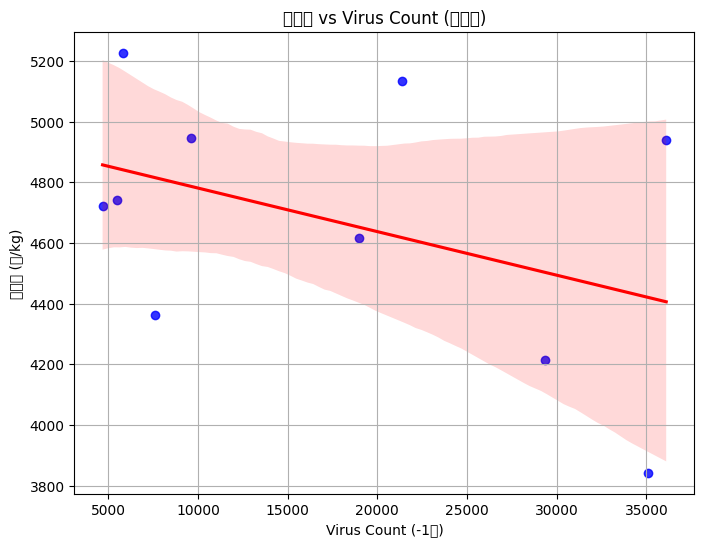

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시차 1년 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-1년)',
    y='도축가',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('도축가 vs Virus Count (전년도)')
plt.xlabel('Virus Count (-1년)')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48148 (\N{HANGUL SY

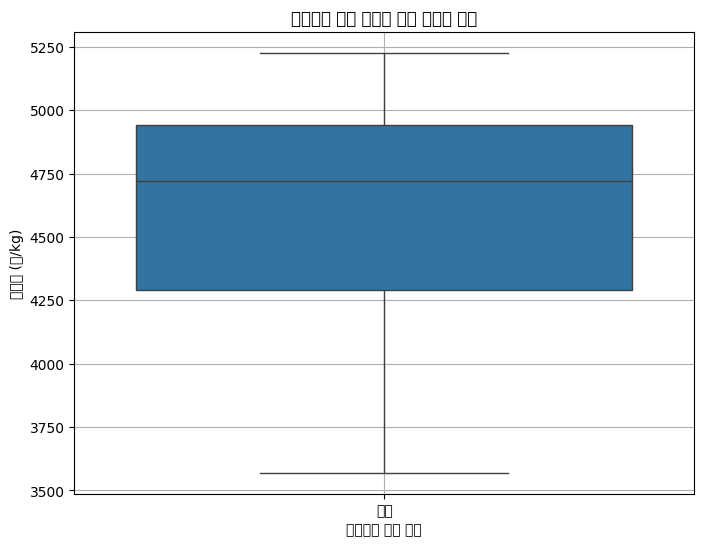

In [92]:
# 바이러스 유무 기준 (건수 0 이상이면 발생으로 간주)
df_merged['Virus_Occurred'] = df_merged['Virus Count'].apply(lambda x: '발생' if x > 0 else '무발생')

# Boxplot으로 비교
plt.figure(figsize=(8, 6))
sns.boxplot(x='Virus_Occurred', y='도축가', data=df_merged)
plt.title('바이러스 발생 여부에 따른 도축가 비교')
plt.xlabel('바이러스 발생 여부')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48320 (\N{HANG

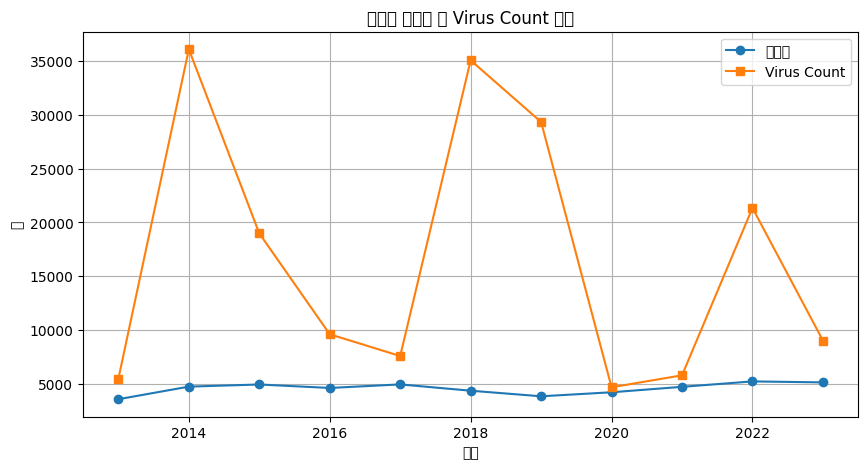

In [93]:
# 꺾은선 그래프
plt.figure(figsize=(10, 5))
plt.plot(df_merged['연도'], df_merged['도축가'], label='도축가', marker='o')
plt.plot(df_merged['연도'], df_merged['Virus Count'], label='Virus Count', marker='s')
plt.title('연도별 도축가 및 Virus Count 변화')
plt.xlabel('연도')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.show()


/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


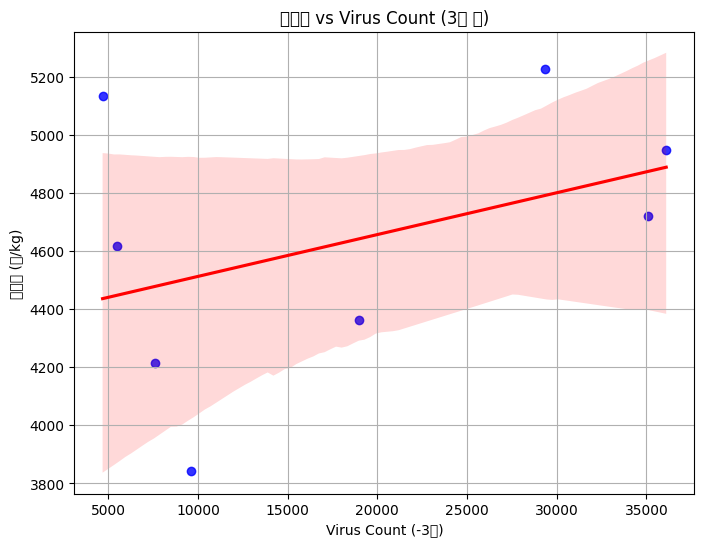

In [94]:
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df_merged,
    x='Virus Count (-3년)',
    y='도축가',
    marker='o',
    line_kws={"color": "red"},
    scatter_kws={"color": "blue"}
)
plt.title('도축가 vs Virus Count (3년 전)')
plt.xlabel('Virus Count (-3년)')
plt.ylabel('도축가 (원/kg)')
plt.grid(True)
plt.show()


In [98]:
from sklearn.linear_model import LinearRegression
import numpy as np

# NaN 제거
df_reg = df_merged[['도축가', 'Virus Count (-3년)']].dropna()

# 변수 분리
X = df_reg[['Virus Count (-3년)']]
y = df_reg['도축가']

# 모델 적합
model = LinearRegression()
model.fit(X, y)

# 결과 출력
print(f"기울기 (coef): {model.coef_[0]:.2f}")
print(f"절편 (intercept): {model.intercept_:.2f}")
print(f"R² (설명력): {model.score(X, y):.2f}")


기울기 (coef): 0.01
절편 (intercept): 4369.03
R² (설명력): 0.17


/tmp/ipykernel_30626/3485902907.py:18: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_feed = pd.read_sql(query, conn)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/c

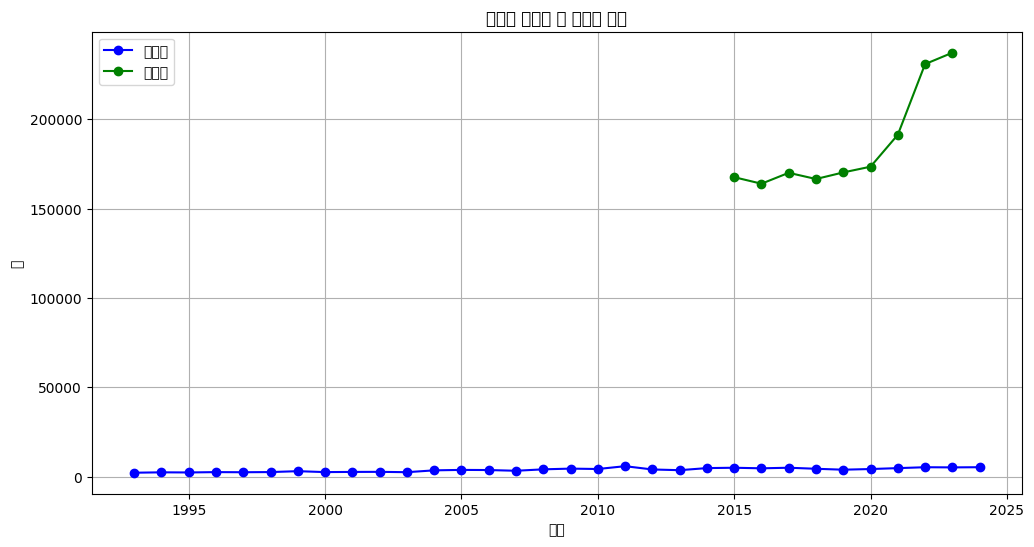

/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/sungyoon/project1/.venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SY

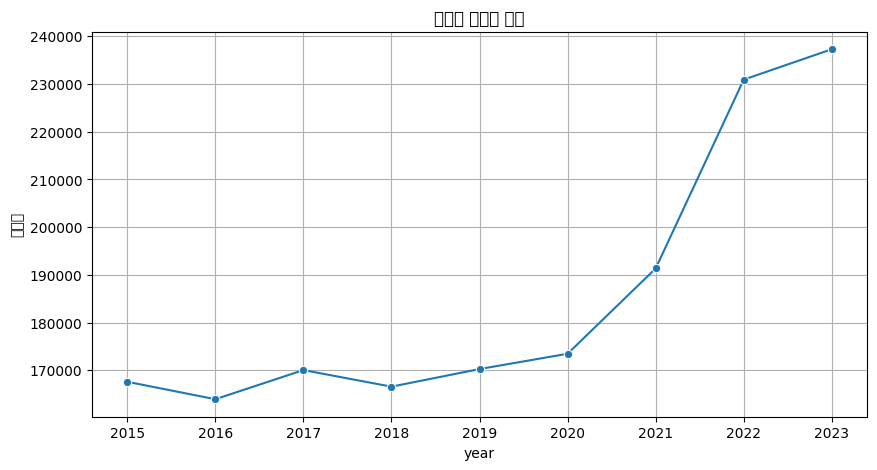

In [108]:
import pandas as pd
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ RDS 접속 정보
conn = pymysql.connect(
    host='database-1.cba44miw26by.ap-northeast-2.rds.amazonaws.com',
    port=3306,
    user='psy',
    password='0000',
    database='pig',
    charset='utf8mb4'
)

# ✅ feed 테이블 불러오기 (사료비)
query = "SELECT * FROM feed"
df_feed = pd.read_sql(query, conn)

# ✅ 연결 종료
conn.close()

# ✅ 연도별 평균 사료비 계산
yearly_feed = df_feed.groupby('year').mean(numeric_only=True).reset_index()

# ✅ 도축가 전처리
df_price['도축가'] = pd.to_numeric(
    df_price['도축가'].astype(str).str.replace(',', ''), errors='coerce'
)

# ✅ 시각화: 도축가 & 사료비 변화
plt.figure(figsize=(12, 6))
plt.plot(df_price['연도'], df_price['도축가'], marker='o', linestyle='-', color='b', label='도축가')
plt.plot(yearly_feed['year'], yearly_feed['사료비'], marker='o', linestyle='-', color='g', label='사료비')
plt.xlabel('연도')
plt.ylabel('값')
plt.title('연도별 도축가 및 사료비 변화')
plt.grid(True)
plt.legend()
plt.show()

# ✅ 시각화: 사료비 단독 추이
plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_feed, x='year', y='사료비', marker='o')
plt.title('연도별 사료비 추이')
plt.grid(True)
plt.show()


/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/3820212079.py:20: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

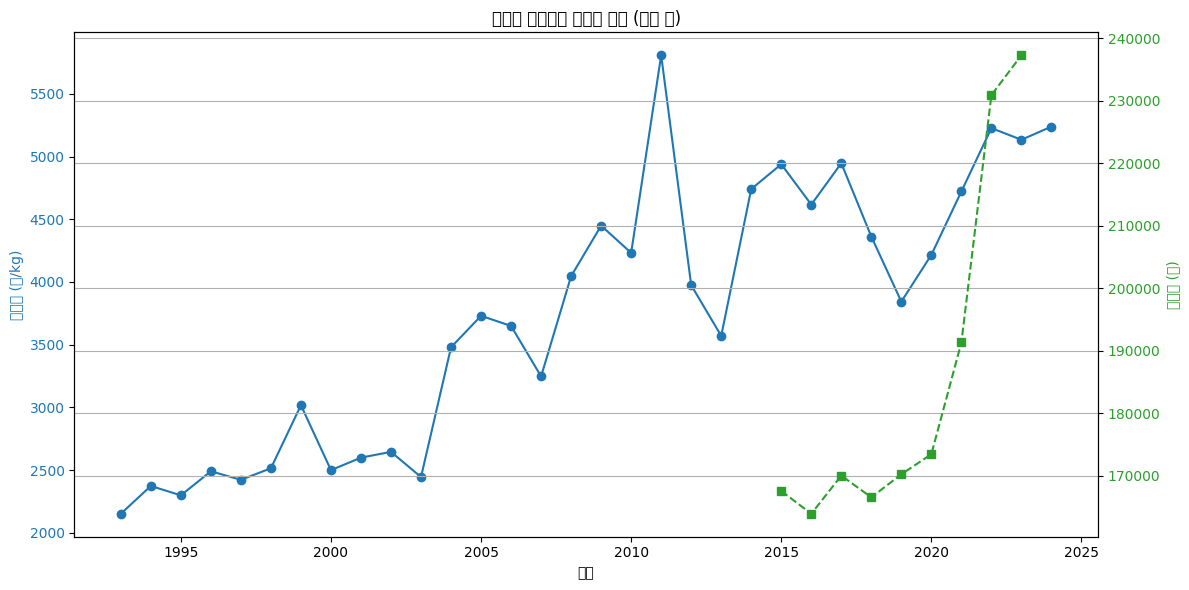

In [109]:
# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_price['연도'], df_price['도축가'], marker='o', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(yearly_feed['year'], yearly_feed['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('연도별 도축가와 사료비 변화 (이중 축)')
fig.tight_layout()
plt.grid(True)
plt.show()


/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.tight_layout()
/tmp/ipykernel_30626/2336121204.py:25: UserWarning: Glyph 47308 (\N{HANGUL SYLLABLE RYO}) missing from font(s) DejaVu Sans.
  fig.t

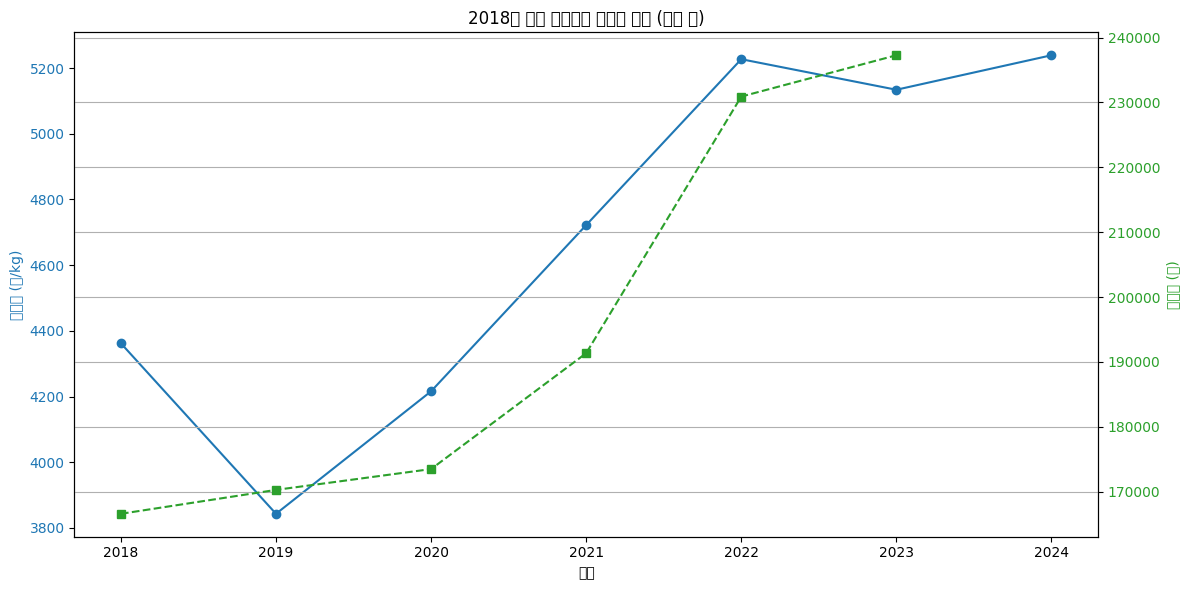

In [110]:
# 2018년 이후 데이터만 필터링
df_price_filtered = df_price[df_price['연도'] >= 2018]
yearly_feed_filtered = yearly_feed[yearly_feed['year'] >= 2018]

# 이중 y축 그래프
fig, ax1 = plt.subplots(figsize=(12, 6))

# 도축가 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('연도')
ax1.set_ylabel('도축가 (원/kg)', color=color1)
ax1.plot(df_price_filtered['연도'], df_price_filtered['도축가'], marker='o', linestyle='-', color=color1, label='도축가')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(df_price_filtered['연도'])

# 사료비 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:green'
ax2.set_ylabel('사료비 (원)', color=color2)
ax2.plot(yearly_feed_filtered['year'], yearly_feed_filtered['사료비'], marker='s', linestyle='--', color=color2, label='사료비')
ax2.tick_params(axis='y', labelcolor=color2)

# 제목 및 꾸미기
plt.title('2018년 이후 도축가와 사료비 변화 (이중 축)')
fig.tight_layout()
plt.grid(True)
plt.show()


In [113]:
from meteostat import Monthly, Point
import pandas as pd
from datetime import datetime

# 위치 (서울 예시)
seoul = Point(37.5665, 126.9780)

# 기간 설정
start = datetime(2023, 1, 1)
end = datetime(2023, 12, 31)

# 데이터 가져오기
data = Monthly(seoul, start, end)
df = data.fetch()
print(df)


            tavg  tmin  tmax   prcp  wspd    pres  tsun
time                                                   
2023-01-01  -1.4  -5.6   3.0   44.0   8.7  1024.7   NaN
2023-02-01   2.4  -1.7   7.1    1.2   8.2  1025.6   NaN
2023-03-01   9.8   4.3  15.9   16.6   8.4  1019.8   NaN
2023-04-01  13.8   9.0  18.8   92.7   9.1  1014.2   NaN
2023-05-01  19.7  14.7  24.9   82.4   8.4  1012.4   NaN
2023-06-01  23.4  19.8  27.7  134.0   7.9  1006.3   NaN
2023-07-01  26.7  23.9  30.0  305.7   7.7  1006.5   NaN
2023-08-01  27.1  24.4  30.6  324.6   7.8  1004.8   NaN
2023-09-01  23.6  20.3  27.4  137.7   7.3  1012.3   NaN
2023-10-01  15.8  11.6  20.8   42.8   6.9  1018.1   NaN
2023-11-01   6.6   3.0  11.4  129.9   9.1  1021.0   NaN
2023-12-01   1.2  -2.4   5.1   91.5   9.2  1024.3   NaN
